### EDA
This note book looks through different csv files containing nutrient data. The hope is to link it with health issues including but not limited to Malnutrition and Obesity.

It will focus on one file per "cycle"

Possible Questions to answer:
- Which food group has the highest average energy content?
- What is the distribution of protein content across different food groups?
- Are there any foods that exceed the recommended daily allowance (RDA) for fat or sodium?
- Which food group has the highest amount of calcium per serving?
- Are there any foods that provide a significant amount of dietary fiber while being low in calories?
- Is there a correlation between the energy content and the amount of carbohydrates in the food?
- What is the distribution of Protein across food groups?

In [22]:
import pandas as pd
import seaborn as sns



df = pd.read_csv('data/nndb_flat.csv')
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


#### Checking datatypes

In [23]:
df.dtypes

ID                    int64
FoodGroup            object
ShortDescrip         object
Descrip              object
CommonName           object
MfgName              object
ScientificName       object
Energy_kcal         float64
Protein_g           float64
Fat_g               float64
Carb_g              float64
Sugar_g             float64
Fiber_g             float64
VitA_mcg            float64
VitB6_mg            float64
VitB12_mcg          float64
VitC_mg             float64
VitE_mg             float64
Folate_mcg          float64
Niacin_mg           float64
Riboflavin_mg       float64
Thiamin_mg          float64
Calcium_mg          float64
Copper_mcg          float64
Iron_mg             float64
Magnesium_mg        float64
Manganese_mg        float64
Phosphorus_mg       float64
Selenium_mcg        float64
Zinc_mg             float64
VitA_USRDA          float64
VitB6_USRDA         float64
VitB12_USRDA        float64
VitC_USRDA          float64
VitE_USRDA          float64
Folate_USRDA        

### Dealing with nulls

In [24]:
df.isna()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8614,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8615,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8616,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# notcommited to this step as it might cause wrong data brought forward 
for col in df:
    if df[col].isnull().sum() > 0:
        try:
            df[col].fillna(df[col].mean(), inplace = True)
        except:
            df[col].fillna(df[col].mode()[0],inplace = True)


df


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",hamburger,"Kellogg, Co.",Phaseolus vulgaris,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",hamburger,"Kellogg, Co.",Phaseolus vulgaris,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",hamburger,"Kellogg, Co.",Phaseolus vulgaris,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",hamburger,"Kellogg, Co.",Phaseolus vulgaris,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",hamburger,"Kellogg, Co.",Phaseolus vulgaris,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",hamburger,"Kellogg, Co.",Phaseolus vulgaris,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",hamburger,"Kellogg, Co.",Phaseolus vulgaris,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",hamburger,"Kellogg, Co.",Phaseolus vulgaris,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",hamburger,"Kellogg, Co.",Phaseolus vulgaris,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [26]:
df = pd.get_dummies(df, columns=['ScientificName'])
df = pd.get_dummies(df, columns=['FoodGroup'])

df

,ID,ShortDescrip,Descrip,CommonName,MfgName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,...,FoodGroup_Nut and Seed Products,FoodGroup_Pork Products,FoodGroup_Poultry Products,FoodGroup_Restaurant Foods,FoodGroup_Sausages and Luncheon Meats,FoodGroup_Snacks,"FoodGroup_Soups, Sauces, and Gravies",FoodGroup_Spices and Herbs,FoodGroup_Sweets,FoodGroup_Vegetables and Vegetable Products
0,1001,"BUTTER,WITH SALT","Butter, salted",hamburger,"Kellogg, Co.",717.0,0.85,81.11,0.06,0.06,...,0,0,0,0,0,0,0,0,0,0
1,1002,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",hamburger,"Kellogg, Co.",717.0,0.85,81.11,0.06,0.06,...,0,0,0,0,0,0,0,0,0,0
2,1003,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",hamburger,"Kellogg, Co.",876.0,0.28,99.48,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,1004,"CHEESE,BLUE","Cheese, blue",hamburger,"Kellogg, Co.",353.0,21.40,28.74,2.34,0.50,...,0,0,0,0,0,0,0,0,0,0
4,1005,"CHEESE,BRICK","Cheese, brick",hamburger,"Kellogg, Co.",371.0,23.24,29.68,2.79,0.51,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,"MACKEREL,SALTED","Fish, mackerel, salted",hamburger,"Kellogg, Co.",305.0,18.50,25.10,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
8614,90240,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",hamburger,"Kellogg, Co.",111.0,20.54,0.84,5.41,0.00,...,0,0,0,0,0,0,0,0,0,0
8615,90480,"SYRUP,CANE","Syrup, Cane",hamburger,"Kellogg, Co.",269.0,0.00,0.00,73.14,73.20,...,0,0,0,0,0,0,0,0,1,0
8616,90560,"SNAIL,RAW","Mollusks, snail, raw",hamburger,"Kellogg, Co.",90.0,16.10,1.40,2.00,0.00,...,0,0,0,0,0,0,0,0,0,0


### Dealing with categorical data

### Trying a predictive model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

X = df.drop(['ID', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName','Energy_kcal'], axis=1)
y = df['Energy_kcal']

#spli into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [28]:
# create the model 
model = LinearRegression()

# fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score:", r2)

R^2 score: -1174539326.310692


In [30]:
y_pred_train= model.predict(X_train)
r2 = r2_score(y_train, y_pred_train)
print("R^2 score:", r2)

R^2 score: 0.9924242602540162


## Visualizations

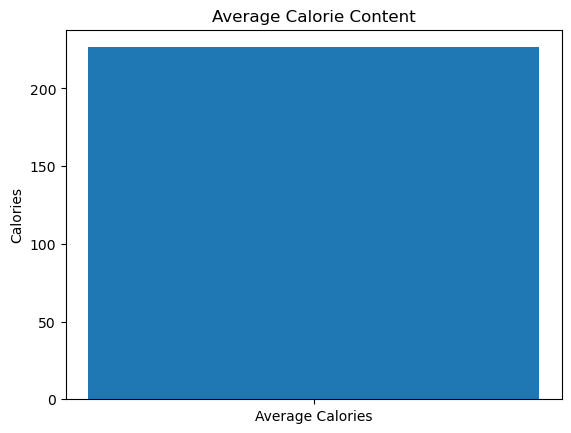

In [31]:
# Question 1: Average Calorie Content
average_calories = df['Energy_kcal'].mean()

# Bar chart for Average Calorie Content
plt.bar(['Average Calories'], [average_calories])
plt.ylabel('Calories')
plt.title('Average Calorie Content')
plt.show()

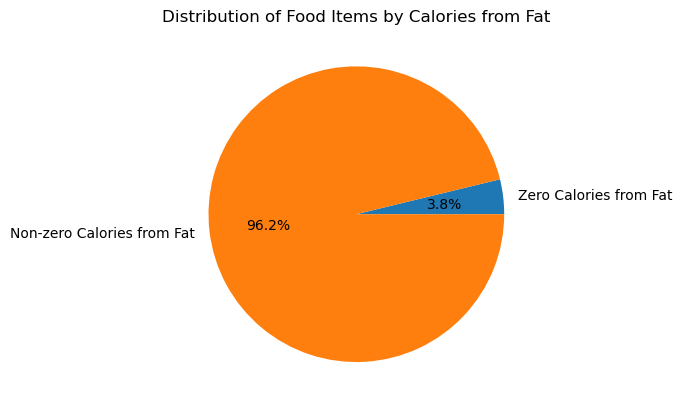

In [32]:
# Question 2: Count of Food Items with Zero Calories from Fat
zero_calories_from_fat_count = df[df['Fat_g'] == 0].shape[0]

# Pie chart for Count of Food Items with Zero Calories from Fat
labels = ['Zero Calories from Fat', 'Non-zero Calories from Fat']
sizes = [zero_calories_from_fat_count, df.shape[0] - zero_calories_from_fat_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Food Items by Calories from Fat')
plt.show()


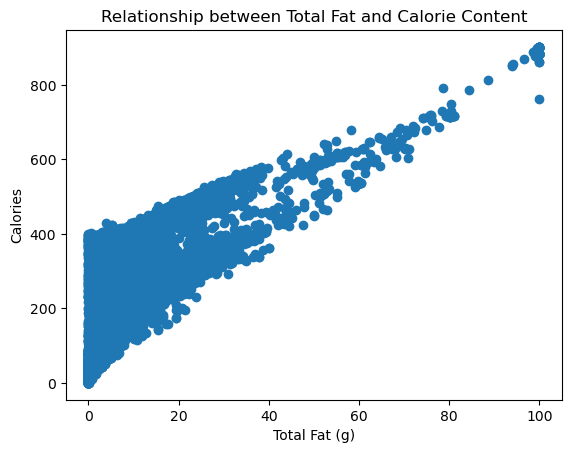

In [33]:
# Question 4: Correlation between Total Fat and Calorie Content
correlation = df['Fat_g'].corr(df['Energy_kcal'])

plt.scatter(df['Fat_g'], df['Energy_kcal'])
plt.xlabel('Total Fat (g)')
plt.ylabel('Calories')
plt.title('Relationship between Total Fat and Calorie Content')
plt.show()

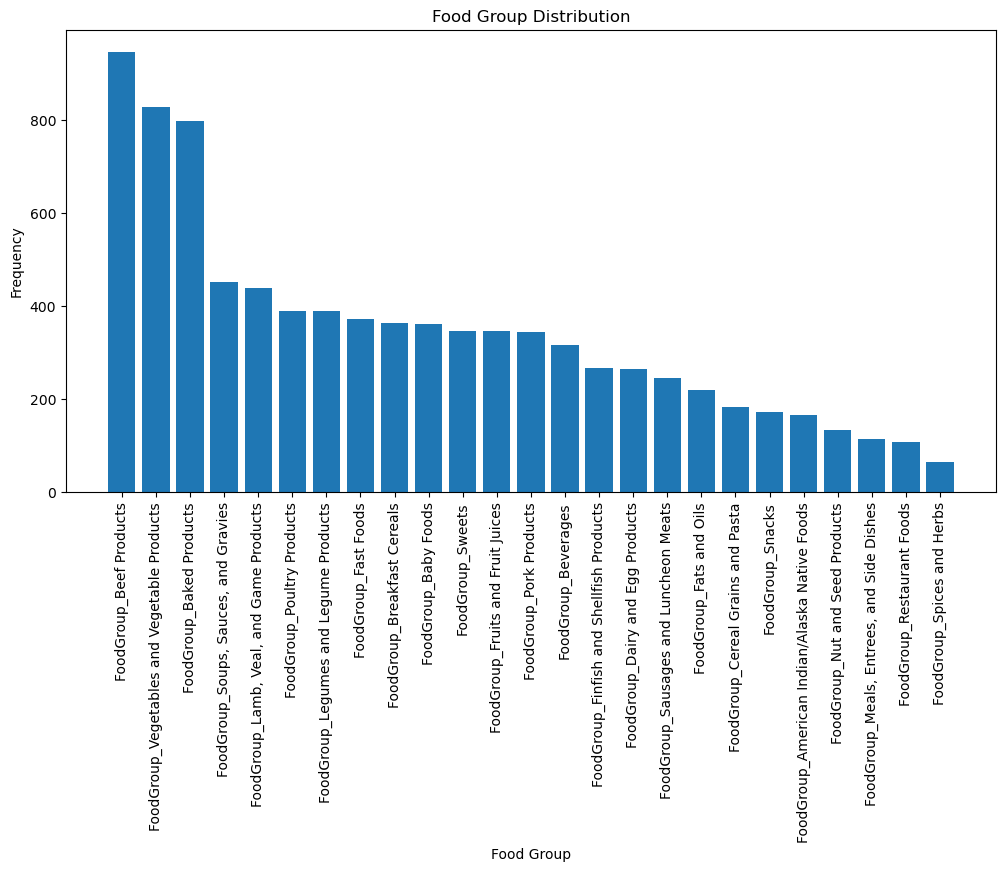

In [34]:
# #food group distribution

# Counting the frequency of each food group
food_group_columns = [col for col in df.columns if col.startswith('FoodGroup_')]
food_groups = df[food_group_columns].sum().sort_values(ascending=False)

# Creating the bar plot
plt.figure(figsize=(12, 6))
plt.bar(food_groups.index, food_groups.values)

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Frequency')
plt.title('Food Group Distribution')

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


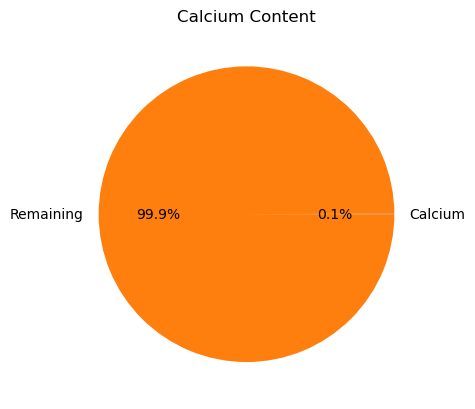

In [35]:
calcium = df['Calcium_USRDA'].mean()
plt.pie([calcium, 100 - calcium], labels=['Calcium', 'Remaining'], autopct='%1.1f%%')
plt.title('Calcium Content')
plt.show()


C:\Users\JaneelAbrahams\AppData\Local\Temp\ipykernel_12712\1057309549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_groups['Protein_g'] = df['Protein_g']


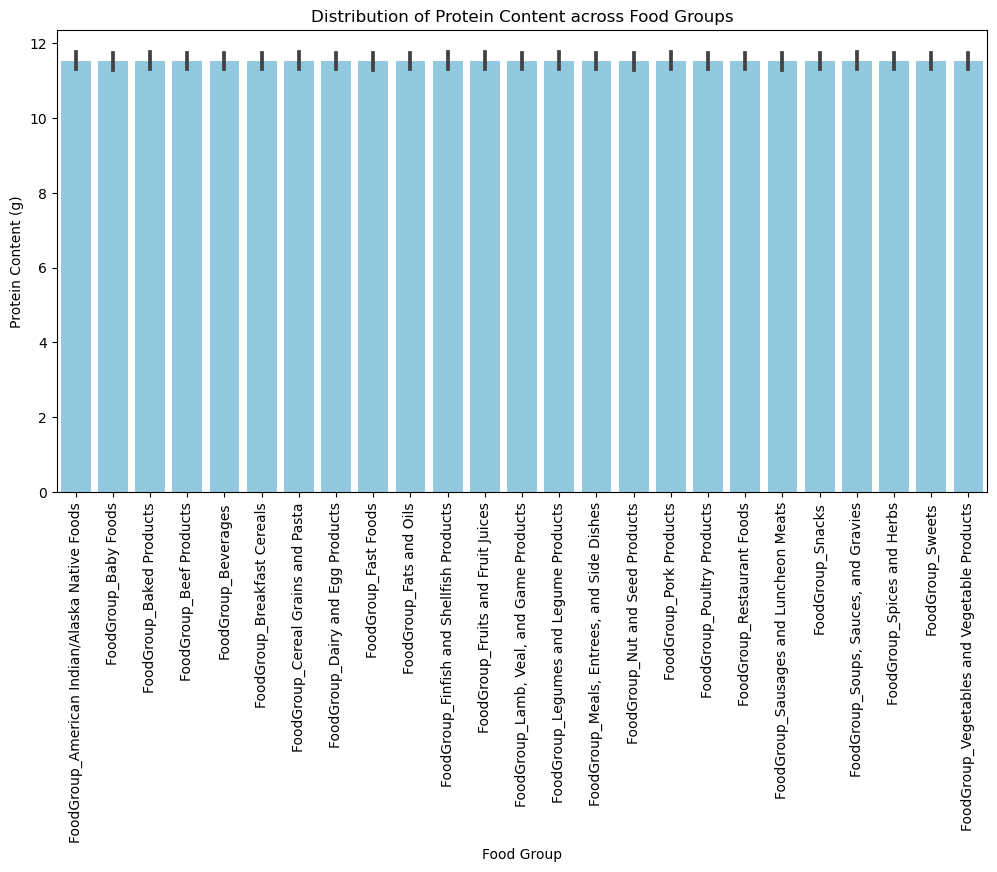

In [36]:
# Selecting the food group columns
food_groups = df.filter(regex='^FoodGroup_')

# Adding the 'Protein_g' column to the food group columns
food_groups['Protein_g'] = df['Protein_g']

# Reshaping the data using melt
melted_data = food_groups.melt(id_vars=['Protein_g'], var_name='FoodGroup', value_name='FoodGroupValue')

# Creating the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='FoodGroup', y='Protein_g', data=melted_data, color='skyblue')

# Adding labels and title
plt.xlabel('Food Group')
plt.ylabel('Protein Content (g)')
plt.title('Distribution of Protein Content across Food Groups')

# Rotating x-axis labels
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


In [40]:
# Select the relevant columns for nutrient analysis
nutrient_columns = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']

# Calculate the nutrient summary
nutrient_summary = df[nutrient_columns].describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]

# Transpose the nutrient summary for better display
nutrient_summary = nutrient_summary.T

# Display the nutrient summary
nutrient_summary

,count,mean,std,min,25%,50%,75%,max
Energy_kcal,8618.0,226.438617,169.388910,0.0,93.0000,191.000,336.0000,902.00
Protein_g,8618.0,11.523910,10.550590,0.0,2.4700,8.285,19.9775,88.32
Fat_g,8618.0,10.647024,15.866353,0.0,0.9925,5.235,13.9000,100.00
Carb_g,8618.0,21.819062,27.239000,0.0,0.0400,8.945,32.9000,100.00
Sugar_g,8618.0,6.560253,13.602098,0.0,0.0000,0.370,5.3000,99.80


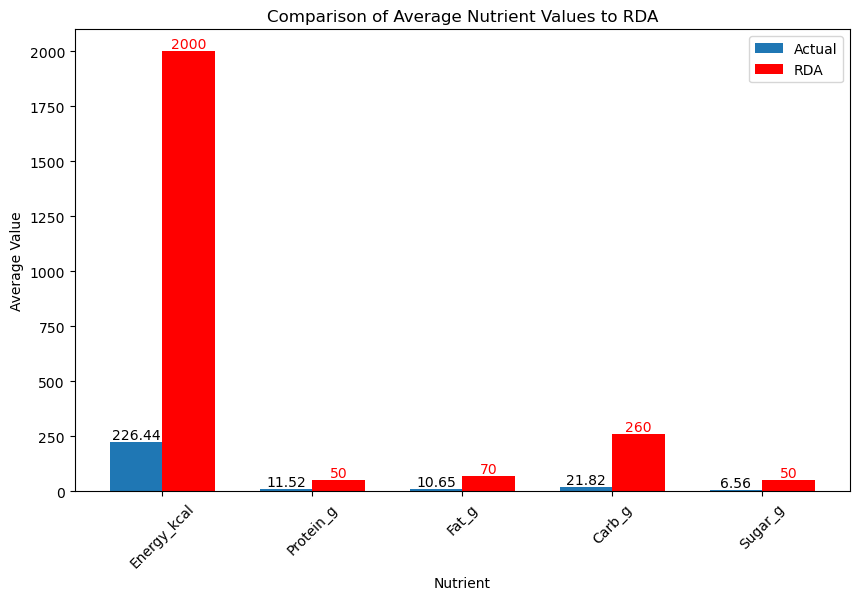

In [46]:
import numpy as np

# Select the relevant columns for nutrient analysis
nutrient_columns = ['Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g']

# Calculate the average nutrient values
average_values = df[nutrient_columns].mean()

# Define RDA values for each nutrient
rda_values = {'Energy_kcal': 2000, 'Protein_g': 50, 'Fat_g': 70, 'Carb_g': 260, 'Sugar_g': 50}

# Create a list of nutrient labels
nutrient_labels = list(average_values.index)

# Create an array of positions for the bars
bar_positions = np.arange(len(nutrient_labels))

# Define the width of the bars
bar_width = 0.35

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
actual_bars = ax.bar(bar_positions, average_values, bar_width, label='Actual')
rda_bars = ax.bar(bar_positions + bar_width, list(rda_values.values()), bar_width, color='red', label='RDA')

# Add labels and title
ax.set_xlabel('Nutrient')
ax.set_ylabel('Average Value')
ax.set_title('Comparison of Average Nutrient Values to RDA')

# Add actual values as annotations on the plot
for i in range(len(nutrient_labels)):
    ax.text(bar_positions[i], average_values[i], str(round(average_values[i], 2)), ha='center', va='bottom')

# Add RDA values as annotations on the plot
for i in range(len(nutrient_labels)):
    ax.text(bar_positions[i] + bar_width, list(rda_values.values())[i], str(list(rda_values.values())[i]), ha='center', va='bottom', color='red')

# Adjust x-axis ticks and labels
ax.set_xticks(bar_positions + bar_width / 2)
ax.set_xticklabels(nutrient_labels, rotation=45)

# Show the legend
ax.legend()

# Display the plot
plt.show()


### Beginning of of Cycle 2 
Different dataset

possible questions to answer:

- What is the average calorie content of the food items?
- How many food items have zero calories from fat?
- Which food item has the highest amount of sodium?
- Is there a correlation between the total fat content and the calorie content?
- What is the average amount of potassium in the food items?
- Are there any food items that have a high amount of cholesterol?
- How does the serving size affect the calorie content of the food items?
- What is the distribution of saturated fat across the food items?
- Are there any food items that are categorized as both fruits and seafood?
- How many food items belong to the vegetable category?

In [ ]:
df2 = pd.read_csv('data/NutritionalFacts_Fruit_Vegetables_Seafood.csv')
df2

### Checking datatypes for csv2

In [ ]:
df2.dtypes

### Dealing with nulls

In [ ]:
df2.isnull()

In [ ]:
# handling conflicting datatypes and missing values
for col in df2.columns:
    if df2[col].dtype == 'object':
        df2[col].fillna(df2[col].mode()[0], inplace=True)
    else:
#         df2[col] = pd.to_numeric(df2[col], errors='coerce')
        df2[col].fillna(df2[col].mean(), inplace=True)
        
df

## Dealing with possible not null conflicting types

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder



# split the "Food and Serving" column into "Food" and "Serving" columns
df2[['Food', 'Serving']] = df2['Food and Serving'].str.split(',', n=1, expand=True)

# drop the original "Food and Serving" column
df2.drop('Food and Serving', axis=1, inplace=True)

def serving_size_to_float(serving_size):
    if serving_size is None:
        return float(0)
    try:
        return float(serving_size.strip(' g'))
    except ValueError:
        return float(0)


df2['Serving Size (g)'] = df2['Serving'].apply(serving_size_to_float)
df2.drop('Serving', axis=1, inplace=True)

# encode food names using label encoding
df2[['Food', 'Type']] = df2['Food Type'].str.split(',', n=1, expand=True)

le_food = LabelEncoder()
df2['Food Encoded'] = le_food.fit_transform(df2['Food'])
le_type = LabelEncoder()
df2['Type Encoded'] = le_type.fit_transform(df2['Type'])

# Print the modified dataframe
df2.head(10)



In [ ]:

df2 = pd.get_dummies(df2, columns=['Food'])

df2.drop('Type', axis=1, inplace=True)
df2.drop('Food Type', axis=1, inplace=True)
df2 = df2.drop(0)


df2


### Preparing predictive model + test/train data

In [ ]:
#Defining X and y

X = df2.drop(['Calories'], axis=1)
y = df2['Calories']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

# Train the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

# Evaluate the model
print(f'Training Score: {model2.score(X_train, y_train)}')
print(f'Testing Score: {model2.score(X_test, y_test)}')

### Visualizations

In [ ]:
#Distribution of calories
plt.hist(df2['Calories'], bins=10)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

In [ ]:
#Total Fat and Sodium

plt.scatter(df2['Total Fat'], df2['Sodium'])
plt.xlabel('Total Fat')
plt.ylabel('Sodium')
plt.title('Relationship between Total Fat and Sodium')
plt.show()


In [ ]:
#Average Carbohydrate Content

average_carbohydrates = df2['Total Carbo-hydrate'].mean()
plt.bar(['Average Carbohydrates'], [average_carbohydrates])
plt.ylabel('Carbohydrates')
plt.title('Average Carbohydrate Content')
plt.show()


In [ ]:
# Distribution of Saturated Fat
plt.hist(df2['Saturated Fat'], bins=10)
plt.xlabel('Saturated Fat')
plt.ylabel('Frequency')
plt.title('Distribution of Saturated Fat')
plt.show()
